In [95]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch import optim, nn
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler

In [98]:
import helpers_self

In [99]:
cpu_device = 'cpu'
cpu_device

gpu_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
gpu_device

'cpu'

device(type='cuda', index=0)

In [100]:
eval_size = 0.2
batch_size = 32
num_workers = 0

In [101]:
transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                           ])

In [102]:
train_dataset = datasets.FashionMNIST(root = 'data',
                                       train = True,
                                       download = True,
                                       transform = transform)

test_dataset = datasets.FashionMNIST(root = 'data',
                                       train = True,
                                       download = True,
                                       transform = transform)

In [103]:
train_dataset_len = len(train_dataset)
train_dataset_len

60000

In [104]:
indices = list(range(train_dataset_len))
indices[:5]

[0, 1, 2, 3, 4]

In [105]:
np.random.shuffle(indices)
indices[:5]

[16497, 54185, 20613, 57826, 20526]

In [106]:
split = int(np.floor(train_dataset_len * eval_size))
train_idx, eval_idx = indices[split:], indices[:split]

In [107]:
len(train_idx)

48000

In [108]:
len(eval_idx)

12000

In [109]:
train_sampler = SubsetRandomSampler(train_idx)
eval_sampler = SubsetRandomSampler(eval_idx)

In [110]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           sampler = train_sampler,
                                           num_workers = num_workers
                                          )

eval_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          sampler = eval_sampler,
                                          num_workers = num_workers
                                         )

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False,
                                          num_workers = num_workers,
                                          
                                          
                                         )

In [111]:
# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [112]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [113]:
images.to(cpu_device)
labels.to(cpu_device)

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.5216, -1.0000, -0.9922],
          ...,
          [-0.6549,  1.0000,  0.6863,  ...,  0.5373, -1.0000, -1.0000],
          [-1.0000, -1.0000, -0.7490,  ..., -0.5137, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.000

tensor([0, 5, 4, 4, 6, 9, 0, 1, 4, 0, 3, 4, 8, 2, 8, 9, 3, 8, 0, 2, 6, 8, 4, 2,
        6, 6, 4, 1, 9, 3, 5, 9])

In [114]:
type(images)
images.shape

torch.Tensor

torch.Size([32, 1, 28, 28])

In [115]:
images.shape

torch.Size([32, 1, 28, 28])

In [116]:
type(labels)
labels.shape
labels

torch.Tensor

torch.Size([32])

tensor([0, 5, 4, 4, 6, 9, 0, 1, 4, 0, 3, 4, 8, 2, 8, 9, 3, 8, 0, 2, 6, 8, 4, 2,
        6, 6, 4, 1, 9, 3, 5, 9])

In [117]:
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'

#ax.set_xticklabels(labels)

In [118]:
InteractiveShell.ast_node_interactivity = 'none'

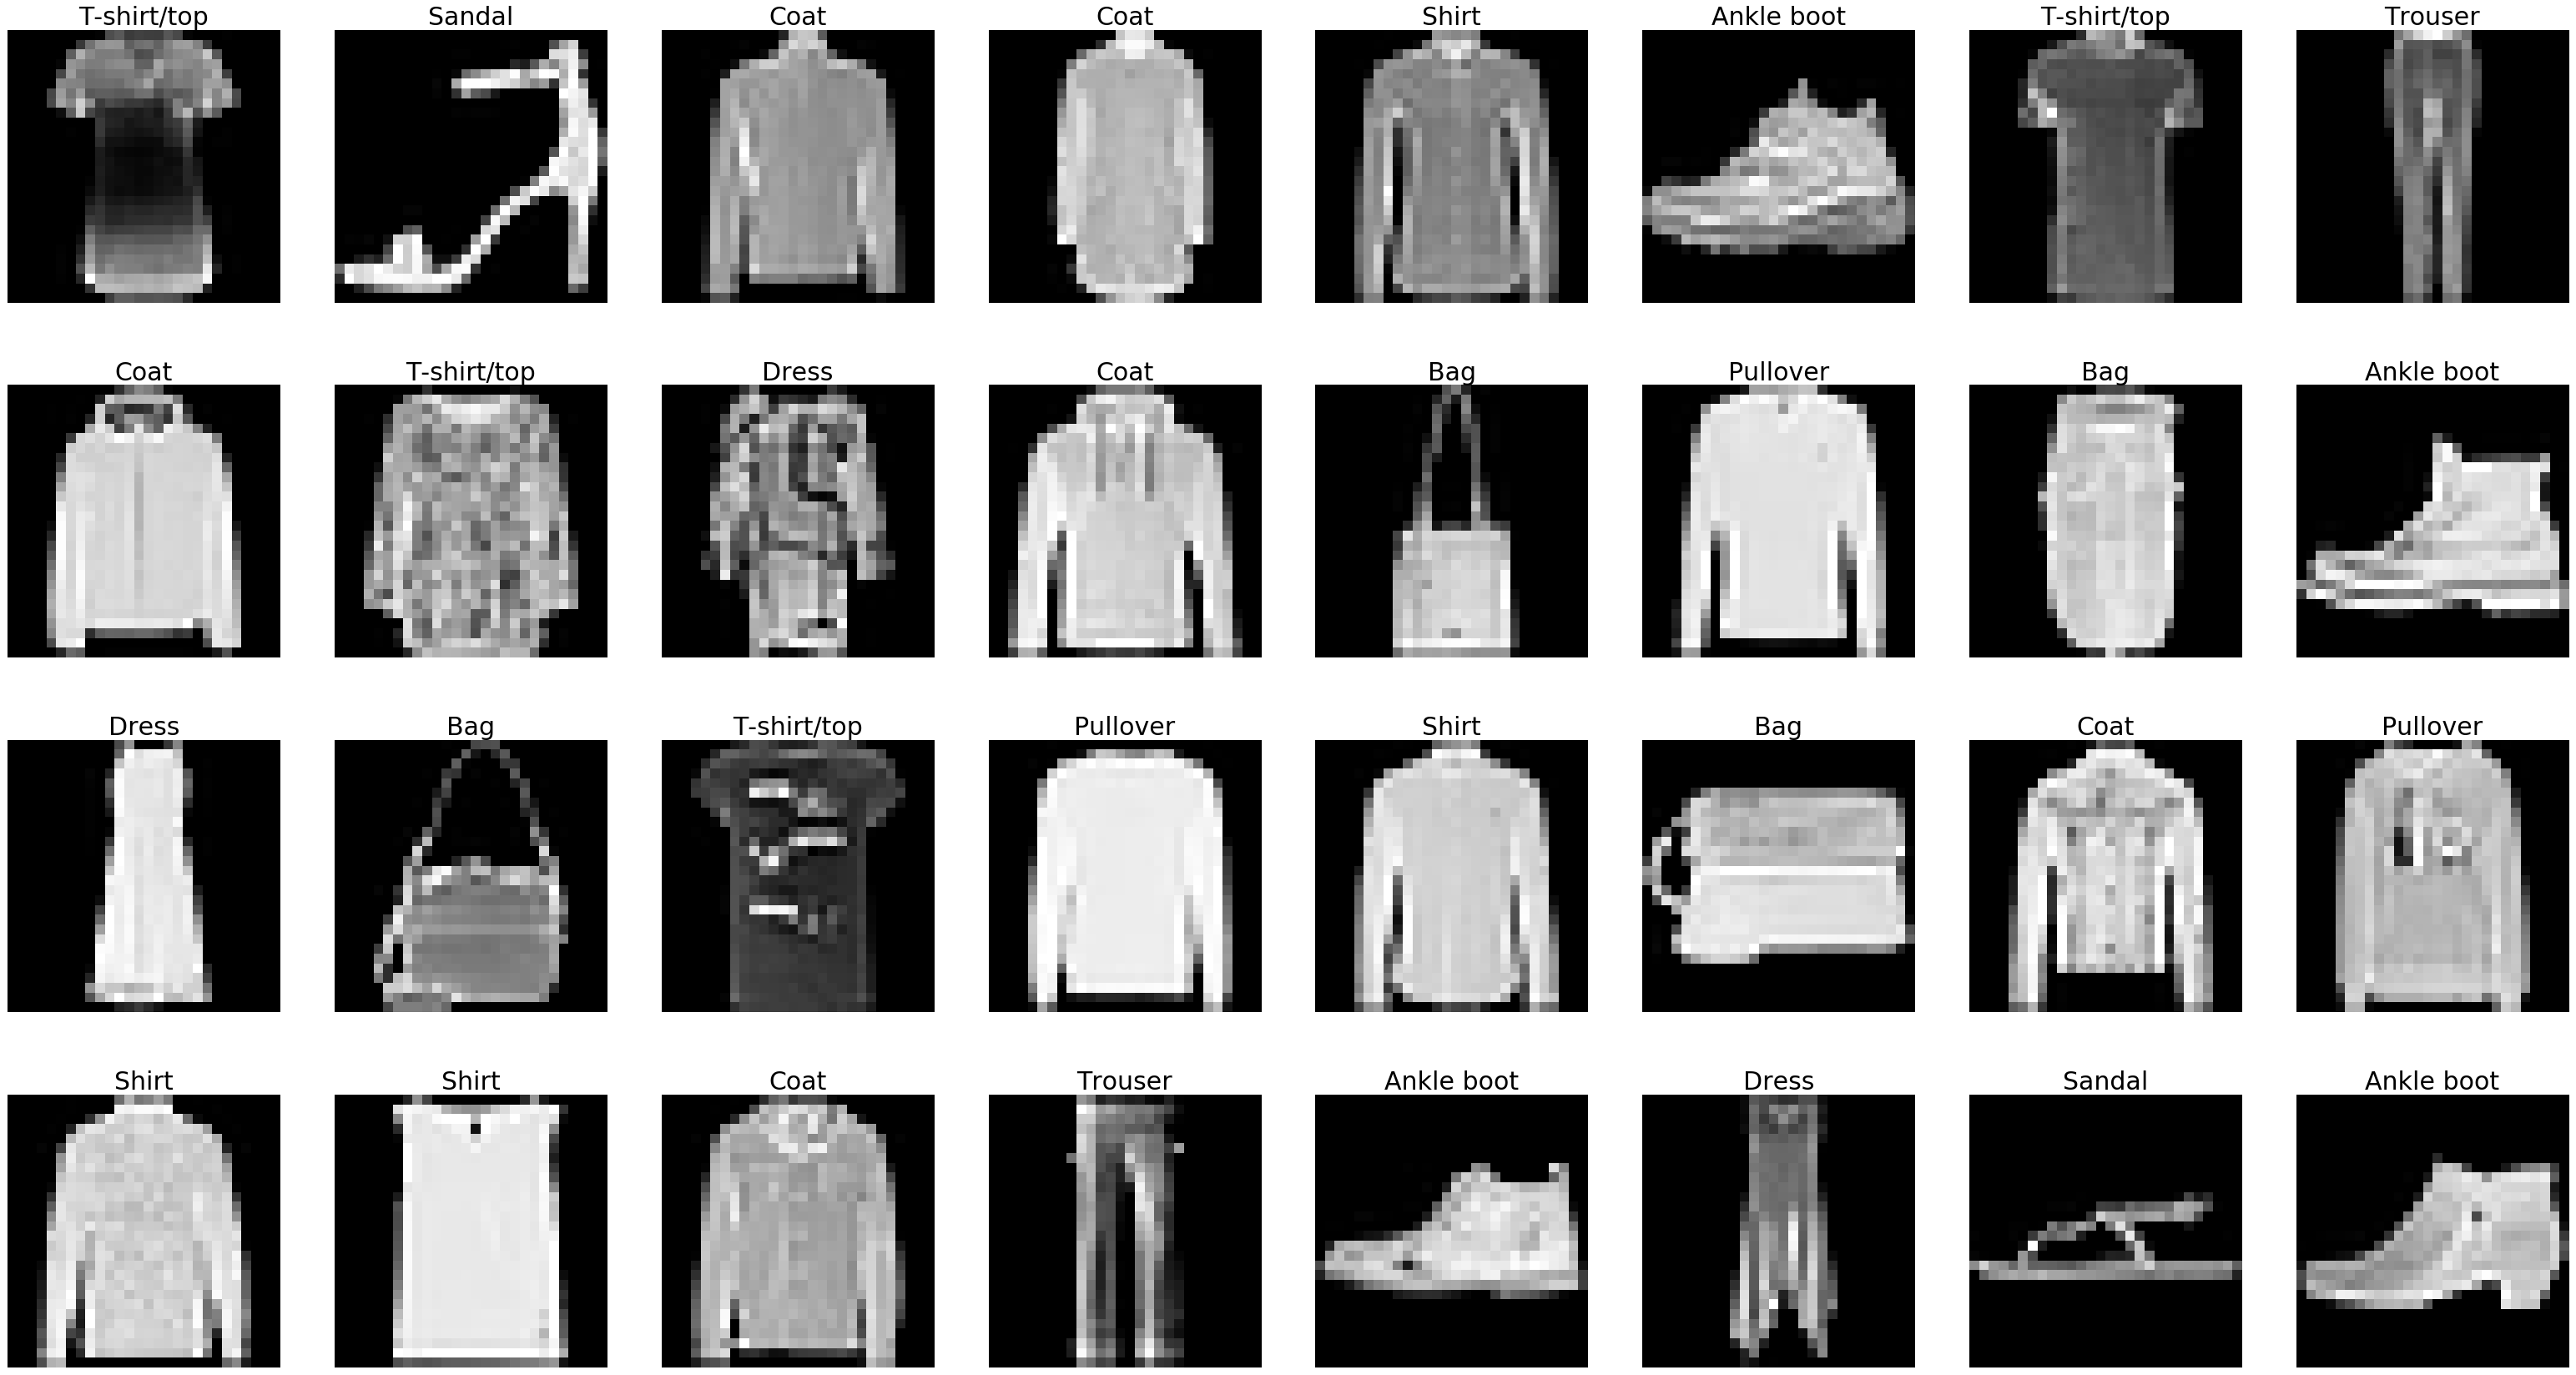

In [119]:
plt.figure(figsize = (55, 30))
for idx in range(batch_size):
    ax = plt.subplot(4, 8, idx + 1, xticks = [], yticks = [])
    helpers_self.imshow(ax, images[idx, :], classes[labels[idx].item()])

In [120]:
class Cnn_fashion_mnist(nn.Module):
    
    def __init__(self):
        super(Cnn_fashion_mnist, self).__init__()

        self.hidden_layer_i = nn.Linear(784, 256)

        self.hidden_layer_ii = nn.Linear(256, 128)

        self.output = nn.Linear(128, 10)
        
        
    def forward(self, x):

        x = F.relu(self.hidden_layer_i(x))

        x = F.relu(self.hidden_layer_ii(x))

        x = self.output(x)
        
        return x

In [121]:
InteractiveShell.ast_node_interactivity = 'all'

In [122]:
model = Cnn_fashion_mnist()
model.to(gpu_device)
model

Cnn_fashion_mnist(
  (hidden_layer_i): Linear(in_features=784, out_features=256, bias=True)
  (hidden_layer_ii): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

Cnn_fashion_mnist(
  (hidden_layer_i): Linear(in_features=784, out_features=256, bias=True)
  (hidden_layer_ii): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [123]:
optimizer = optim.Adagrad(model.parameters(), lr = 0.01)
optimizer

Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.01
    lr_decay: 0
    weight_decay: 0
)

In [124]:
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

In [125]:
InteractiveShell.ast_node_interactivity = 'none'

In [126]:
epochs = 1

In [127]:
for epoch in range(epochs):
    
    training_loss = 0.0
    eval_loss = 0.0
    
    model.train()
    for epoch_id, (images, labels) in enumerate(train_loader):
        images, labels = images.to(gpu_device), labels.to(gpu_device)
        images = images.view(batch_size, -1)

        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        training_loss += loss.item() * batch_size
    else:
        with torch.no_grad():
            model.eval()

            for eval_batch_id, (images, labels) in enumerate(eval_loader):

                images, labels = images.to(gpu_device), labels.to(gpu_device)
                images = images.view(batch_size, -1)

                output = model.forward(images)
                loss = criterion(output, labels)

                eval_loss += loss.item() * batch_size
    
    avg_training_loss = training_loss/len(train_loader)
    avg_eval_loss = eval_loss/len(eval_loader)
    
    print(
    "Epoch {} : Training Loss {:.5f} | Eval Loss {:.5f}".format(
        epoch + 1,
        avg_training_loss,
        avg_eval_loss
        )
    )

Epoch 1 : Training Loss 15.56174 | Eval Loss 12.89622


In [128]:
with torch.no_grad():
    model.eval()

    test_iter = iter(test_loader)
    test_images, test_labels = next(test_iter)
    test_images, test_labels = test_images.to(gpu_device), test_labels.to(gpu_device)
    test_images = test_images.view(batch_size, -1)
    
    output = model.forward(test_images)
    _, predicted_class = torch.max(input = output, dim = 1)
    
    test_images, test_labels = test_images.to(cpu_device), test_labels.to(cpu_device).numpy()
    predicted_class = predicted_class.to(cpu_device).numpy()
    
    equals = predicted_class == test_labels
    accuracy = np.mean(equals)
    
    print('Accuracy on Test Dataset {}'.format(accuracy))

Accuracy on Test Dataset 0.875


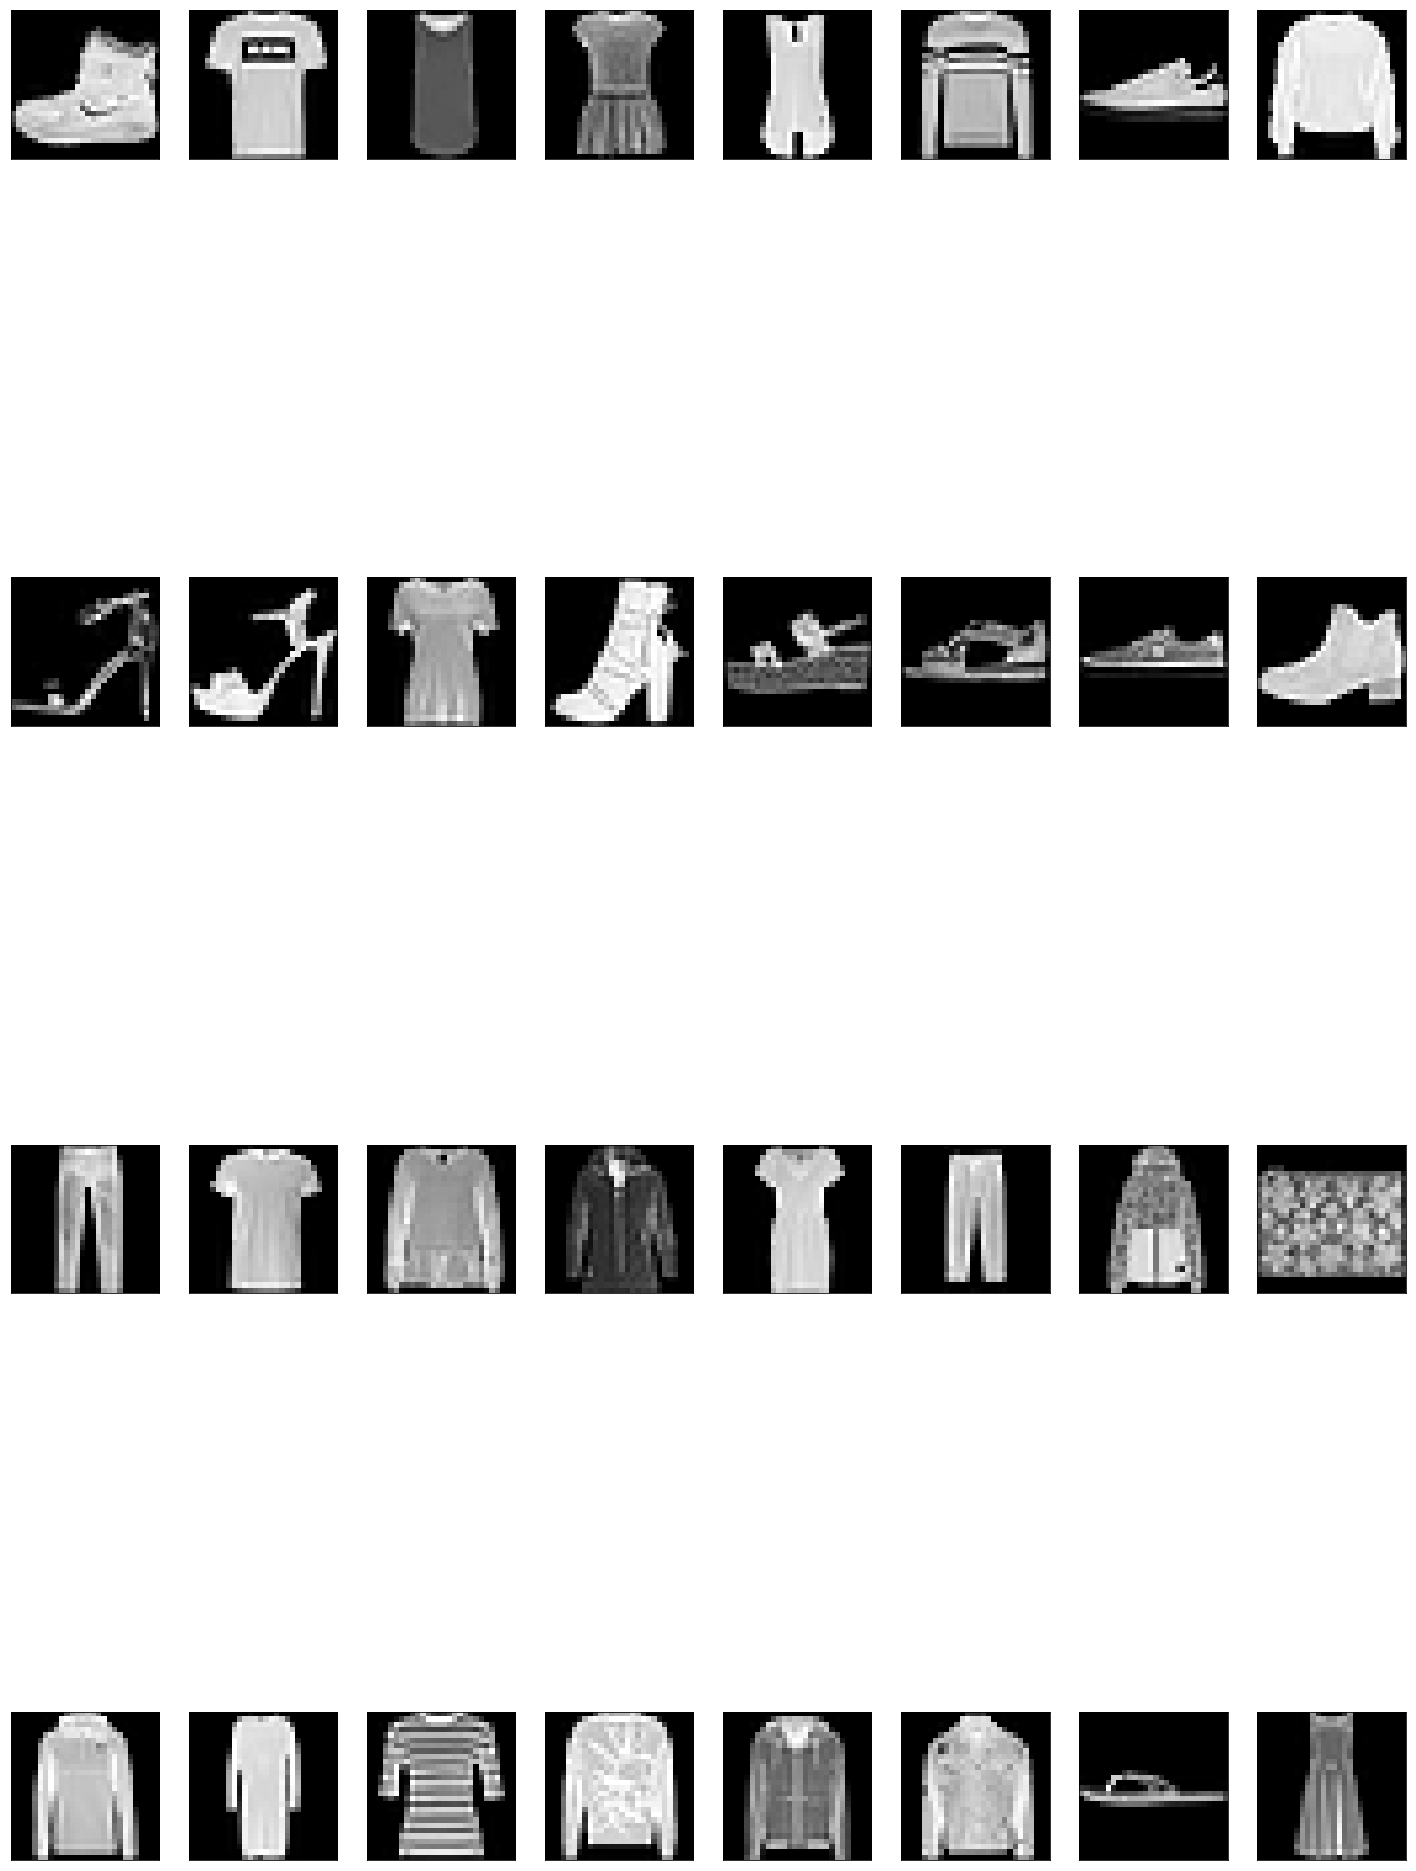

In [133]:
plt.figure(figsize = (25, 40))
for index in range(batch_size):
    
    ax = plt.subplot(4, 8, index + 1, xticks = [], yticks = [])
    img = test_images[index].view(28, 28).numpy()
    
    
    ax.imshow(img, cmap = 'gray')